#  Read CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path="StackPros_CodingTestData.csv"
df=pd.read_csv(path)
df.head(10)

,Action,ID,ActionTime,Website,BannerSize,Brand,Color,InteractionTime
0,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1501207373254968,Facebook,728x90,JoeFresh,Pink,0.755182
1,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1501209660836689,Facebook,160x600,JoeFresh,Yellow,1.181643
2,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1501209717498078,Facebook,160x600,Disney,Gold,0.145707
3,Click,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1502831370458655,kijiji,300x250,Zara,White,0.139795
4,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1502831506975457,kijiji,300x250,Carter's,Pink,0.436069
5,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1503351921109728,Facebook,160x600,Zara,Red,2.894969
6,Click,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1505434684991942,Facebook,160x600,Gap,White,NaN
7,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1505445690268414,Facebook,160x600,Burberry,Gold,0.539683
8,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1505623612427643,kijiji,300x250,Disney,Gold,0.956567
9,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1505637875085757,kijiji,300x250,Carter's,Pink,0.147046


# Feature Exploration and Transformation

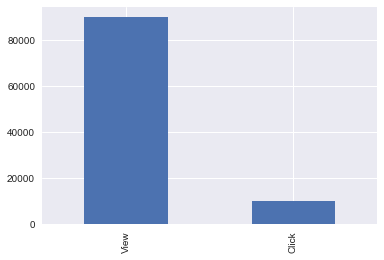

In [3]:
df.Action.value_counts().plot(kind='bar')

<p>We have imbalance classes in our data, that means more record for View as compared to Click</p>
<i>Note:Therefore we should <b>balance classes while training model<i>

## Clicks for Websites

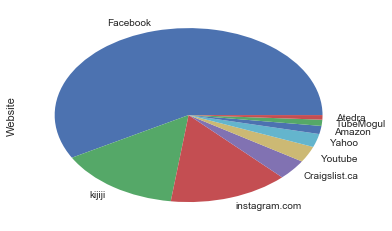

In [4]:
df[df.Action == 'Click']['Website'].value_counts().plot(kind='pie')

## Views for Websites

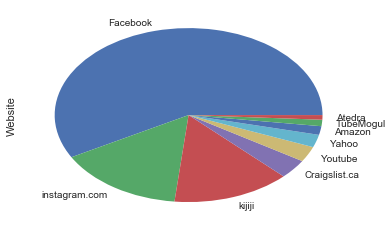

In [5]:
df[df.Action == 'View']['Website'].value_counts().plot(kind='pie')

<p>Instagram has more views than Kijiji but clicks for kijiji are more.</p>

## Brand with Most ads

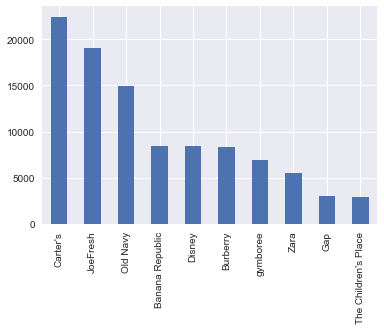

In [6]:
df.Brand.value_counts().plot(kind='bar')

### Lets see whether clicks for these brand are same or not

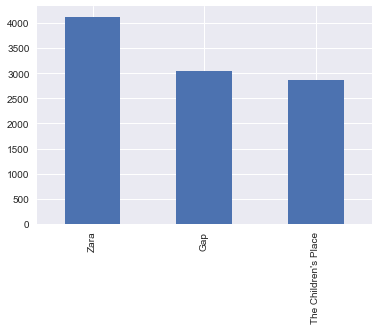

In [7]:
df[df.Action == 'Click']['Brand'].value_counts().plot(kind='bar')

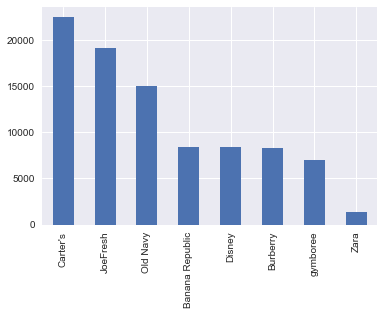

In [8]:
df[df.Action == 'View']['Brand'].value_counts().plot(kind='bar')

Only Brands Zara, Gap, The Children's Place have Clicks on there advertisement and out of them only zara has views. That means all advertisement by Gap and The Children's place are clicked. Also, Other brand advertisements are just viewed. This is very important feature as we can differentiate between clicks and views by just brand name.  

### Lets see whether the color of advertisement has effect on clicks or not

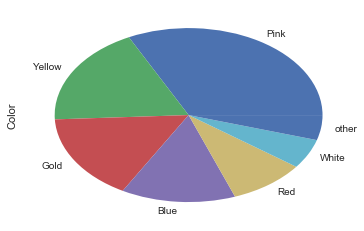

In [41]:
df.Color.value_counts().plot(kind='pie')

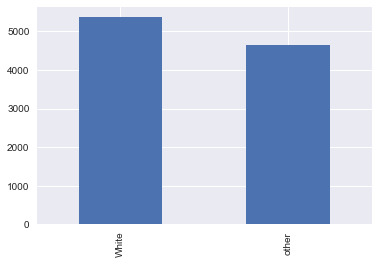

In [10]:
df[df.Action == 'Click']['Color'].value_counts().plot(kind='bar')

That means only white and other color advertisements are clicked. Thus color is an another important feature that can clearly differentiate between whether an advertisement will be cliked or just viewed.

## Interaction Time

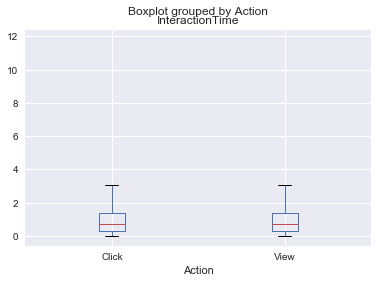

In [11]:
df.boxplot(column='InteractionTime',by = 'Action')

The average Interaction Time corresponding to View is little bit more than average Interaction Time for Click. One more point, if the interaction time for a particular event goes more than 9 than chances of that event being a click is neglible.

In [12]:
df[df.InteractionTime >= 4]['Action'].value_counts()/df['Action'].value_counts()

View     0.018283
Click    0.022040
Name: Action, dtype: float64

Only 2% of the data  has interaction time more than 4 seconds in both the cases, so we can drop those.

In [13]:
df=df[df.InteractionTime < 4]

##  How does Area(Banner Size) Impact Clicks

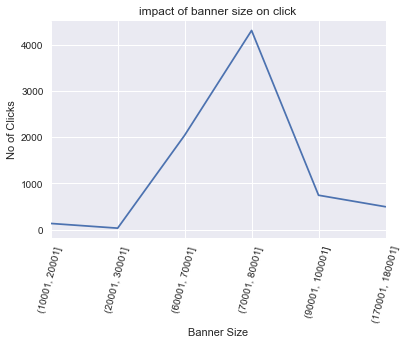

In [14]:
import numpy as np
def calculate_Area(value):
    if value is not None:
        try:
            a,b=value.split('x')
            a=int(a.strip())
            b=int(b.strip())
            return a*b
        except:
            return np.nan
    else:
        return np.nan
df['Area']=df['BannerSize'].map(calculate_Area)
df['bin'] = pd.cut(df['Area'], range(int(df.Area.min()),int(df.Area.max()),10000) )
temp_df=df[df.Action == 'Click']['bin'].value_counts(sort=False)
temp_df[temp_df > 0].plot(kind='line')
plt.xticks(rotation=75)
plt.xlabel('Banner Size')
plt.ylabel('No of Clicks')
plt.title('impact of banner size on click')

No of click increases with banner size only up to certain limit after that we witness a decrease again.

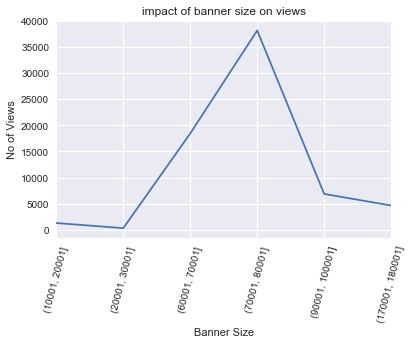

In [15]:
temp_df=df[df.Action == 'View']['bin'].value_counts(sort=False)
temp_df[temp_df > 0].plot(kind='line')
plt.xticks(rotation=75)
plt.xlabel('Banner Size')
plt.ylabel('No of Views')
plt.title('impact of banner size on views')

No of Views are also affected by banner size in sameway as No of clicks. Since this feature has same behavior for both the classes, it doesnt seem relevant to use it. However at this stage we will let our model decide and try to use lasso regularization to counter such type of features.

## Impact by hour of day

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F251AC8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000133F7470>], dtype=object)

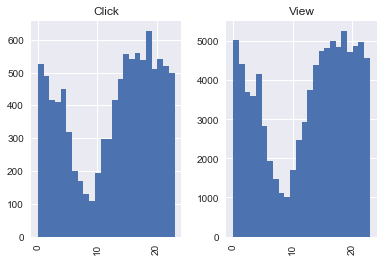

In [16]:
from datetime import timedelta
def gethourofday(value):
    if not np.isnan(value):
        td=timedelta(microseconds=value)
        hour=td.seconds // 3600
        return hour
    else:
        return np.nan
df['hour']=df.ActionTime.map(gethourofday)
df.hist(column='hour',by='Action',bins=24)

Most clicks and views are in 18-19th Hour and least are in 9th-10th hour. This information can be very crucial for clients with limited budget, as they just want to advertise during the peak hours rather than whole day and thus help them save money on advertisement by keeping the gains at par.

## Missing Value/Outliers

In [17]:
df.isnull().sum()

Action                 0
ID                     0
ActionTime             0
Website                0
BannerSize             0
Brand                  0
Color                  0
InteractionTime        0
Area               18188
bin                20592
hour                   0
dtype: int64

In [18]:
df[df.Area.isnull()]['Action'].value_counts()/df['Action'].value_counts()

View     0.185853
Click    0.181038
Name: Action, dtype: float64

we have 18% of missing values for both the classes. Thus we cannot drop this much data.

In [19]:
df['Area'].describe()

count     79928.000000
mean      96706.505317
std      109210.443692
min           1.000000
25%       65520.000000
50%       75000.000000
75%       75000.000000
max      752400.000000
Name: Area, dtype: float64

std is nearly 100k we can remove anything beyond 2 std (consider them to be outliers).

In [20]:
df[df.Area > 200000].shape[0] * 1.0 / df.shape[0]

0.02045537934689551

since we have 2% <b>outliers</b> we can remove them and use average to fill out missing values. if we had high number of outliers then we should use median instead of average, as average will be affected by outliers.

In [21]:
df=df[df.Area<=200000]

In [22]:
df.Area.fillna(df.Area.mean(),inplace=True)

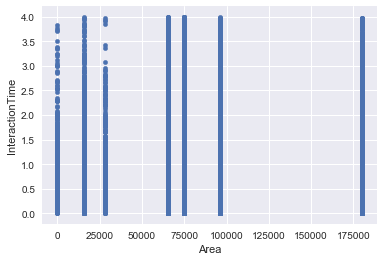

In [23]:
df.plot(x='Area',y='InteractionTime',kind='scatter')

## Feature Engineering

Create Dummy variable for the categorical features. 

In [24]:
df_dummy=pd.get_dummies(df[['Website','Brand','Color']])

### Normalizing Area

we should normalize area since it has huge range as compared to other variables that mostly lie between 0-1. Normalization helps in reaching the global minima faster for linear models. 

In [25]:
df.Area= (df.Area - df.Area.mean())/df.Area.std()

### Encoding the Response Variable

In [26]:
def encode_responseVar(value):
    if value == 'Click':
        return 1
    return 0
y=df.Action.map(encode_responseVar)

In [27]:
X=pd.concat([df[['Area','hour','InteractionTime']],df_dummy],axis=1)

### Correlation

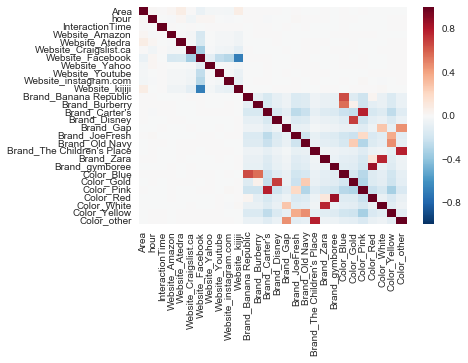

In [28]:
sns.heatmap(X.corr())
plt.show()

There is correlation between Brands And Colors that tells us that how certain brands advertise in certain color only, For example Brand <b><i>"Bannana Republic"</i></b> has 1 correlation score with Color <b><i>"Blue"</i></b>, giving us indication that almost all the advertisement for them are in color blue. 

### Prepare Test And Train

In [29]:
#Divide data into 70%  Train and 30% Test Data 
from sklearn.model_selection import train_test_split
#random state is used to reproduce the results
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=53)

In [30]:
X_train.columns

Index([u'Area', u'hour', u'InteractionTime', u'Website_Amazon',
       u'Website_Atedra', u'Website_Craigslist.ca', u'Website_Facebook',
       u'Website_Yahoo', u'Website_Youtube', u'Website_instagram.com',
       u'Website_kijiji', u'Brand_Banana Republic', u'Brand_Burberry',
       u'Brand_Carter's', u'Brand_Disney', u'Brand_Gap', u'Brand_JoeFresh',
       u'Brand_Old Navy', u'Brand_The Children's Place', u'Brand_Zara',
       u'Brand_gymboree', u'Color_Blue', u'Color_Gold', u'Color_Pink',
       u'Color_Red', u'Color_White', u'Color_Yellow', u'Color_other'],
      dtype='object')

In [31]:
print "After Split: Train Data has"
print "View Click"
print np.unique(y_train,return_counts=True)[1]

After Split: Train Data has
View Click
[49079  5465]


In [32]:
print "After Split:  Test Data has"
print "View Click"
print np.unique(y_test,return_counts=True)[1]

After Split:  Test Data has
View Click
[21043  2334]


## Model

let us compare various different models using cross validation and choose the best model to predict on our test set. 
Cross validation is a good way to proceed because it prevent in over or under analization of your test score.

('LR', 0.9937406268730129)
('NB', 0.9937406268730129)
('KNN', 0.99162547716237248)
('DT', 0.98735555316758106)
('SVM', 0.9937406268730129)


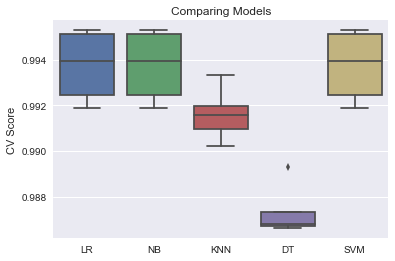

In [33]:
#import model selection techniques
from sklearn.model_selection import KFold,cross_val_score

#import models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
results = []
names = []
kfold = KFold(n_splits=5, random_state=22)


#5 KFold CrossValidation
cv=KFold(n_splits=5)


for name,model in models:    
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = 'f1')
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

plt.title('Comparing Models')
plt.ylabel('CV Score')
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

Almost all the models behaved in sameway. They have a very good score without hyperparameter tuning, i think it was simply because we have linear separable data. As two features Color and Brand literally separates our two Classes Clicks and Views 

In [34]:
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Coffecients of best model

In [35]:
clf.coef_

array([[  9.27462813e-02,  -2.45041324e-03,  -8.66015227e-02,
         -3.68709285e-01,  -3.83646257e-01,  -7.87361249e-01,
         -4.69323787e-01,   2.83684886e-02,  -4.80511362e-01,
          1.68167076e-01,  -7.12349868e-01,  -1.57978294e+00,
         -1.61794488e+00,  -2.08611754e+00,  -1.62019098e+00,
          3.92925292e+00,  -2.13535748e+00,  -2.06787969e+00,
          3.80934184e+00,   1.41995023e+00,  -1.05663771e+00,
         -2.73168255e+00,  -2.71136812e+00,  -2.98314801e+00,
         -3.51696289e+00,   5.63929321e+00,  -2.55898350e+00,
          5.85748562e+00]])

### Score on Train and Test

In [36]:
from sklearn.metrics import confusion_matrix,f1_score

predictions_train=clf.predict(X_train)
print "f1_score training data :%0.2f " % f1_score(predictions_train,y_train,average="weighted")

f1_score training data :1.00 


### ROC Curve

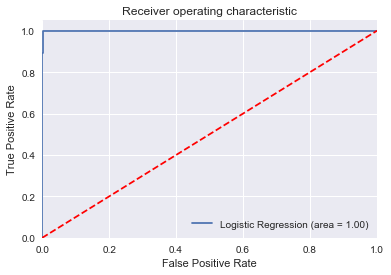

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, clf.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [38]:
predictions_test=clf.predict(X_test)
print "f1_score test data : %0.2f" % f1_score(predictions_test,y_test,average="weighted")

f1_score test data : 1.00


## Confusion Matrix for Test Data

Confusion matrix, without normalization
[[21016    27]
 [    0  2334]]
Normalized confusion matrix
[[ 0.99871691  0.00128309]
 [ 0.          1.        ]]


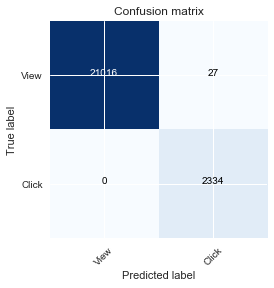

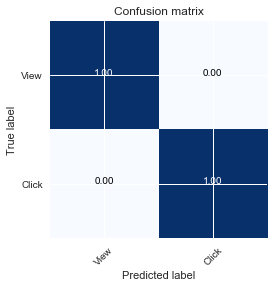

In [39]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm=confusion_matrix(y_test,predictions_test,labels=[0,1])
classes=["View","Click"]
plt.figure()
plot_confusion_matrix(cm,classes)
plt.figure()
plot_confusion_matrix(cm,classes,normalize=True)
plt.show()

### Ensembleming Methods to Find Feature Importance

C:\Installed_Softwares\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Installed_Softwares\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


f1_score training data :1.00 
f1_score test data : 1.00


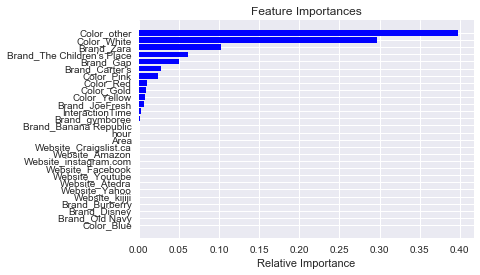

In [40]:
from sklearn.ensemble import RandomForestClassifier

#Bootstrap will enable resampling 
#By setting class_weight="balanced_subsample", classes in the subsample withdrawn will be balanced to produce decision trees
#By setting bagging, the output will depend upon the votes from all the trees
clf = RandomForestClassifier(n_estimators=10,bootstrap=True,oob_score=True,random_state=42,class_weight="balanced_subsample")
clf.fit(X_train,y_train)
predictions_train=clf.predict(X_train)
print "f1_score training data :%0.2f " % f1_score(predictions_train,y_train,average="weighted")
predictions_test=clf.predict(X_test)
print "f1_score test data : %0.2f" % f1_score(predictions_test,y_test,average="weighted")
features=X.columns
importances=clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

As observed during our initial Analysis. <b> Color and Brand name advertising</b> are the two main features that separates Views from Clicks linearly. All other variables have almost neglible effect on our prediction class.

### Further Work

We should simplify our model and only use relevant features.

<center><b><i>Thanks for your time and consideration</i></b></center>

<center><b><i>Madhur Chopra</i></b></center>